# USDA Food Database

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
from pathlib import Path

sys.path.append("../")

from helpers.utils import download_by_url

In [2]:
url = "https://raw.githubusercontent.com/wesm/pydata-book/refs/heads/3rd-edition/datasets/usda_food/database.json"
DATASET_DIR = download_by_url(url, "../input/usa_food_database/database.json")

File already downloaded to: ../input/usa_food_database/database.json


In [3]:
import json

db = json.load(open(Path(DATASET_DIR) / "database.json"))
len(db)

6636

In [4]:
db[0].keys()


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [5]:
db[0]["nutrients"][0]

{'value': 25.18,
 'units': 'g',
 'description': 'Protein',
 'group': 'Composition'}

In [6]:
nutrients = pd.DataFrame(db[0]["nutrients"])
nutrients.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [7]:
info_keys = ["description", "group", "id", "manufacturer"]
info = pd.DataFrame(db, columns=info_keys)
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


In [8]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   description   6636 non-null   object
 1   group         6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [9]:
pd.value_counts(info["group"])[:10]

C:\Users\purch\AppData\Local\Temp\ipykernel_7188\3634668934.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(info["group"])[:10]


group
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: count, dtype: int64

In [10]:
nutrients = []
for rec in db:
    fnuts = pd.DataFrame(rec["nutrients"])
    fnuts["id"] = rec["id"]
    nutrients.append(fnuts)
nutrients = pd.concat(nutrients, ignore_index=True)
nutrients.head()

,value,units,description,group,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [11]:
nutrients.duplicated().sum() # number of duplicates

np.int64(14179)

In [12]:
nutrients = nutrients.drop_duplicates()

In [13]:
col_mapping = {"description": "food", "group": "fgroup"}
info = info.rename(columns=col_mapping, copy=False)
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   food          6636 non-null   object
 1   fgroup        6636 non-null   object
 2   id            6636 non-null   int64 
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [14]:
col_mapping = {"description": "nutrient", "group": "nutgroup"}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375176 entries, 0 to 389354
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   value     375176 non-null  float64
 1   units     375176 non-null  object 
 2   nutrient  375176 non-null  object 
 3   nutgroup  375176 non-null  object 
 4   id        375176 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 17.2+ MB


In [15]:
nutrients.head()

,value,units,nutrient,nutgroup,id
0,25.18,g,Protein,Composition,1008
1,29.20,g,Total lipid (fat),Composition,1008
2,3.06,g,"Carbohydrate, by difference",Composition,1008
3,3.28,g,Ash,Other,1008
4,376.00,kcal,Energy,Energy,1008


In [16]:
ndata = pd.merge(nutrients, info, on="id", how="inner", validate="many_to_one")
ndata.head()

,value,units,nutrient,nutgroup,id,food,fgroup,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


In [23]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   value         375176 non-null  float64
 1   units         375176 non-null  object 
 2   nutrient      375176 non-null  object 
 3   nutgroup      375176 non-null  object 
 4   id            375176 non-null  int64  
 5   food          375176 non-null  object 
 6   fgroup        375176 non-null  object 
 7   manufacturer  293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 22.9+ MB


In [24]:
ndata.iloc[30000]

value                                             0.04
units                                                g
nutrient                                       Glycine
nutgroup                                   Amino Acids
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [17]:
result = ndata.groupby(["nutrient", "fgroup"])["value"].quantile(0.5)
result.head(10)

nutrient          fgroup                           
Adjusted Protein  Sweets                               12.900
                  Vegetables and Vegetable Products     2.180
Alanine           Baby Foods                            0.085
                  Baked Products                        0.248
                  Beef Products                         1.550
                  Beverages                             0.003
                  Breakfast Cereals                     0.311
                  Cereal Grains and Pasta               0.373
                  Dairy and Egg Products                0.271
                  Ethnic Foods                          1.290
Name: value, dtype: float64

<Axes: ylabel='fgroup'>

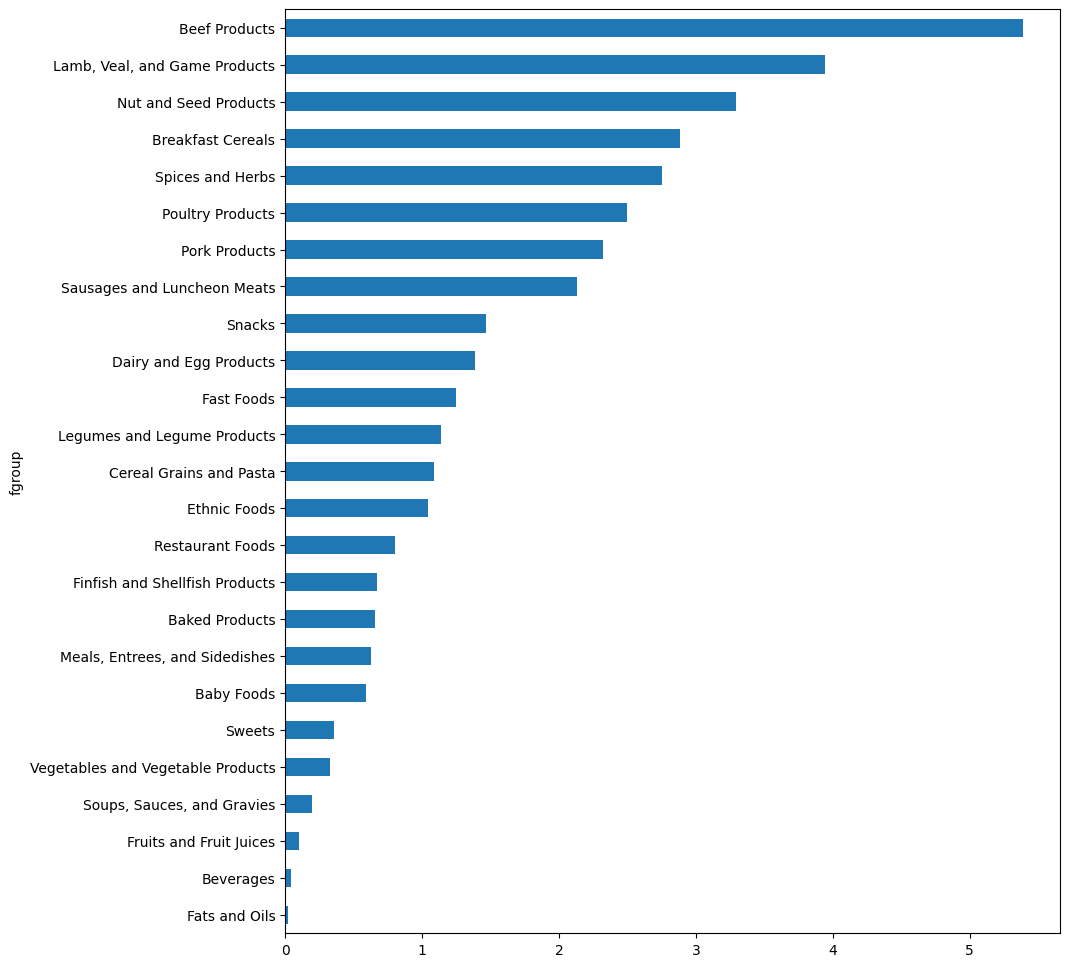

In [18]:
result["Zinc, Zn"].sort_values().plot(kind="barh", figsize=(10, 12))

In [19]:
by_nutrient = ndata.groupby(["nutgroup", "nutrient"])
by_nutrient.size().head(10)

nutgroup     nutrient      
Amino Acids  Alanine           4082
             Arginine          4127
             Aspartic acid     4085
             Cystine           4084
             Glutamic acid     4086
             Glycine           4083
             Histidine         4135
             Hydroxyproline     853
             Isoleucine        4142
             Leucine           4142
dtype: int64

In [20]:
def get_maximum(x):
    return x.loc[x.value.idxmax()]
max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]

# make the food a little smaller
max_foods["food"] = max_foods["food"].str[:50]
max_foods.head(10)

C:\Users\purch\AppData\Local\Temp\ipykernel_7188\330857542.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  max_foods = by_nutrient.apply(get_maximum)[["value", "food"]]


value  \
nutgroup    nutrient                 
Amino Acids Alanine          8.009   
            Arginine         7.436   
            Aspartic acid   10.203   
            Cystine          1.307   
            Glutamic acid   17.452   
            Glycine         19.049   
            Histidine        2.999   
            Hydroxyproline   0.803   
            Isoleucine       4.300   
            Leucine          7.200   

                                                                         food  
nutgroup    nutrient                                                           
Amino Acids Alanine                         Gelatins, dry powder, unsweetened  
            Arginine                             Seeds, sesame flour, low-fat  
            Aspartic acid                                 Soy protein isolate  
            Cystine              Seeds, cottonseed flour, low fat (glandless)  
            Glutamic acid                                 Soy protein isolate  
            Glycine                         Gelatins, dry powder, unsweetened  
            Histidine              Whale, beluga, meat, dried (Alaska Native)  
            Hydroxyproline  KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...  
            Isoleucine      Soy protein isolate, PROTEIN TECHNOLOGIES INTE...  
            Leucine         Soy protein isolate, PROTEIN TECHNOLOGIES INTE...

In [21]:
max_foods.loc["Amino Acids"]["food"].head(10)

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Name: food, dtype: object